# Chroma

이 노트북에서는 Chroma 벡터스토어를 시작하는 방법을 다룹니다.

Chroma는 개발자의 생산성과 행복에 초점을 맞춘 AI 네이티브 오픈 소스 벡터 데이터베이스입니다. Chroma는 Apache 2.0에 따라 라이선스가 부여됩니다. 


**참고링크**

- [Chroma LangChain 문서](https://python.langchain.com/v0.2/docs/integrations/vectorstores/chroma/)
- [Chroma 공식문서](https://docs.trychroma.com/getting-started)
- [LangChain 지원 VectorStore 리스트](https://python.langchain.com/v0.2/docs/integrations/vectorstores/)

In [10]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()


True

In [11]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
try:
    from langchain_teddynote import logging
    # 프로젝트 이름을 입력합니다.
    logging.langsmith("CH09-VectorStores")
    print("✅ LangSmith with teddynote 설정 완료")
except ImportError:
    print("⚠️ langchain-teddynote 패키지를 찾을 수 없습니다.")
    print("다음 명령으로 설치하세요: uv add langchain-teddynote")
    
    # 대안: 표준 LangSmith 설정
    import os
    # os.environ["LANGCHAIN_TRACING_V2"] = "true"
    # os.environ["LANGCHAIN_PROJECT"] = "CH09-VectorStores"
    print("✅ 표준 LangSmith 설정으로 대체")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH09-VectorStores
✅ LangSmith with teddynote 설정 완료


샘플 데이터셋을 로드합니다.

In [13]:
from langchain_community.document_loaders import TextLoader
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma


# 텍스트 분할
text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=0)

# 텍스트 파일을 load -> List[Document] 형태로 변환
loader1 = TextLoader("data/nlp-keywords.txt")
loader2 = TextLoader("data/finance-keywords.txt")

# 문서 분할
split_doc1 = loader1.load_and_split(text_splitter)
split_doc2 = loader2.load_and_split(text_splitter)

# 문서 개수 확인
len(split_doc1), len(split_doc2)

(11, 6)

## VectorStore 생성

### 벡터 저장소 생성 (from_documents)

`from_documents` 클래스 메서드는 문서 리스트로부터 벡터 저장소를 생성합니다. 

**매개변수**

- `documents` (List[Document]): 벡터 저장소에 추가할 문서 리스트
- `embedding` (Optional[Embeddings]): 임베딩 함수. 기본값은 None
- `ids` (Optional[List[str]]): 문서 ID 리스트. 기본값은 None
- `collection_name` (str): 생성할 컬렉션 이름.
- `persist_directory` (Optional[str]): 컬렉션을 저장할 디렉토리. 기본값은 None
- `client_settings` (Optional[chromadb.config.Settings]): Chroma 클라이언트 설정
- `client` (Optional[chromadb.Client]): Chroma 클라이언트 인스턴스
- `collection_metadata` (Optional[Dict]): 컬렉션 구성 정보. 기본값은 None

**참고**

- `persist_directory`가 지정되면 컬렉션이 해당 디렉토리에 저장됩니다. 지정되지 않으면 데이터는 메모리에 임시로 저장됩니다.
- 이 메서드는 내부적으로 `from_texts` 메서드를 호출하여 벡터 저장소를 생성합니다.
- 문서의 `page_content`는 텍스트로, `metadata`는 메타데이터로 사용됩니다.

**반환값**

- `Chroma`: 생성된 Chroma 벡터 저장소 인스턴스

생성시 `documents` 매개변수로 `Document` 리스트를 전달합니다. embedding 에 활용할 임베딩 모델을 지정하며, `namespace` 의 역할을 하는 `collection_name` 을 지정할 수 있습니다.


In [15]:
# DB 생성
db = Chroma.from_documents(
    documents=split_doc1, embedding=OpenAIEmbeddings(), collection_name="my_db"
)

`persist_directory` 지정시 disk 에 파일 형태로 저장합니다.

In [16]:
# 저장할 경로 지정
DB_PATH = "./chroma_db"

# 문서를 디스크에 저장합니다. 저장시 persist_directory에 저장할 경로를 지정합니다.
persist_db = Chroma.from_documents(
    split_doc1, OpenAIEmbeddings(), persist_directory=DB_PATH, collection_name="my_db"
)

아래의 코드를 실행하여 `DB_PATH` 에 저장된 데이터를 로드합니다.

In [17]:
# 디스크에서 문서를 로드합니다.
persist_db = Chroma(
    persist_directory=DB_PATH,
    embedding_function=OpenAIEmbeddings(),
    collection_name="my_db",
)

불러온 VectorStore 에서 저장된 데이터를 확인합니다.

In [18]:
# 저장된 데이터 확인
persist_db.get()

{'ids': ['9f1858c3-1ebf-4cee-aa69-0467313a7819',
  '99e40a21-a42c-429c-a683-7a5a4afd6b4f',
  'a270343f-560f-4ef3-9dea-08f4620fd466',
  'f98937b1-f70a-49dc-945f-fe3f6bf74028',
  'be417679-ba9c-4b6b-9aad-cb3eaae298d5',
  '00aef6f0-bac0-4a18-a6da-0fb3b4b4e4e1',
  '34bf392b-b821-47cf-992b-3ef2392f5a3f',
  'a68cb7e7-6c07-4007-97ed-6039bed8ed8d',
  '10171b22-8eec-418c-9738-969ccc823a78',
  '57331ab4-efa2-4a3c-a1c1-cb0f2c187298',
  '4c1b153f-fe51-4719-a75a-d32cffd95746'],
 'embeddings': None,
 'documents': ['Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 

만약 `collection_name` 을 다르게 지정하면 저장된 데이터가 없기 때문에 아무런 결과도 얻지 못합니다.

In [19]:
# 디스크에서 문서를 로드합니다.
persist_db2 = Chroma(
    persist_directory=DB_PATH,
    embedding_function=OpenAIEmbeddings(),
    collection_name="my_db2",
)

# 저장된 데이터 확인
persist_db2.get()

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

### 벡터 저장소 생성 (from_texts)

`from_texts` 클래스 메서드는 텍스트 리스트로부터 벡터 저장소를 생성합니다.

**매개변수**

- `texts` (List[str]): 컬렉션에 추가할 텍스트 리스트
- `embedding` (Optional[Embeddings]): 임베딩 함수. 기본값은 None
- `metadatas` (Optional[List[dict]]): 메타데이터 리스트. 기본값은 None
- `ids` (Optional[List[str]]): 문서 ID 리스트. 기본값은 None
- `collection_name` (str): 생성할 컬렉션 이름. 기본값은 '_LANGCHAIN_DEFAULT_COLLECTION_NAME'
- `persist_directory` (Optional[str]): 컬렉션을 저장할 디렉토리. 기본값은 None
- `client_settings` (Optional[chromadb.config.Settings]): Chroma 클라이언트 설정
- `client` (Optional[chromadb.Client]): Chroma 클라이언트 인스턴스
- `collection_metadata` (Optional[Dict]): 컬렉션 구성 정보. 기본값은 None

**참고**

- `persist_directory`가 지정되면 컬렉션이 해당 디렉토리에 저장됩니다. 지정되지 않으면 데이터는 메모리에 임시로 저장됩니다.
- `ids`가 제공되지 않으면 UUID를 사용하여 자동으로 생성됩니다.

**반환값**

- 생성된 벡터 저장소 인스턴스

In [20]:
# 문자열 리스트로 생성
db2 = Chroma.from_texts(
    ["안녕하세요. 정말 반갑습니다.", "제 이름은 테디입니다."],
    embedding=OpenAIEmbeddings(),
)

In [21]:
# 데이터를 조회합니다.
db2.get()

{'ids': ['0e7f5445-a6f4-4040-a703-2b933b219c01',
  '0a6f2f43-0b57-4d4c-b8b8-9d3a04d23137'],
 'embeddings': None,
 'documents': ['안녕하세요. 정말 반갑습니다.', '제 이름은 테디입니다.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [None, None]}

### 유사도 검색

`similarity_search` 메서드는 Chroma 데이터베이스에서 유사도 검색을 수행합니다. 이 메서드는 주어진 쿼리와 가장 유사한 문서들을 반환합니다.

**매개변수**

- `query` (str): 검색할 쿼리 텍스트
- `k` (int, 선택적): 반환할 결과의 수. 기본값은 4입니다.
- `filter` (Dict[str, str], 선택적): 메타데이터로 필터링. 기본값은 None입니다.

**참고**

- `k` 값을 조절하여 원하는 수의 결과를 얻을 수 있습니다.
- `filter` 매개변수를 사용하여 특정 메타데이터 조건에 맞는 문서만 검색할 수 있습니다.
- 이 메서드는 점수 정보 없이 문서만 반환합니다. 점수 정보도 필요한 경우 `similarity_search_with_score` 메서드를 직접 사용하세요.

**반환값**

- `List[Document]`: 쿼리 텍스트와 가장 유사한 문서들의 리스트

In [22]:
db.similarity_search("TF IDF 에 대하여 알려줘")

[Document(id='d66e0689-28a3-444e-92bb-7b03a96e37fd', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(id='caf415ae-a754-4505-9459-d8cff056d70d', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의

`k` 값에 검색 결과의 개수를 지정할 수 있습니다.

In [23]:
db.similarity_search("TF IDF 에 대하여 알려줘", k=2)

[Document(id='d66e0689-28a3-444e-92bb-7b03a96e37fd', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(id='caf415ae-a754-4505-9459-d8cff056d70d', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의

`filter` 에 `metadata` 정보를 활용하여 검색 결과를 필터링 할 수 있습니다.

In [24]:
# filter 사용
db.similarity_search(
    "TF IDF 에 대하여 알려줘", filter={"source": "data/nlp-keywords.txt"}, k=2
)

[Document(id='d66e0689-28a3-444e-92bb-7b03a96e37fd', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(id='caf415ae-a754-4505-9459-d8cff056d70d', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의

다음은 `filter` 에서 다른 `source` 를 사용하여 검색한 결과를 확인합니다.

In [25]:
# filter 사용
db.similarity_search(
    "TF IDF 에 대하여 알려줘", filter={"source": "data/finance-keywords.txt"}, k=2
)

[]

### 벡터 저장소에 문서 추가

`add_documents` 메서드는 벡터 저장소에 문서를 추가하거나 업데이트합니다.

**매개변수**

- `documents` (List[Document]): 벡터 저장소에 추가할 문서 리스트
- `**kwargs`: 추가 키워드 인자
  - `ids`: 문서 ID 리스트 (제공 시 문서의 ID보다 우선함)

**참고**

- `add_texts` 메서드가 구현되어 있어야 합니다.
- 문서의 `page_content`는 텍스트로, `metadata`는 메타데이터로 사용됩니다.
- 문서에 ID가 있고 `kwargs`에 ID가 제공되지 않으면 문서의 ID가 사용됩니다.
- `kwargs`의 ID와 문서 수가 일치하지 않으면 ValueError가 발생합니다.

**반환값**

- `List[str]`: 추가된 텍스트의 ID 리스트

**예외**

- `NotImplementedError`: `add_texts` 메서드가 구현되지 않은 경우 발생

In [26]:
from langchain_core.documents import Document

# page_content, metadata, id 지정
db.add_documents(
    [
        Document(
            page_content="안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요",
            metadata={"source": "mydata.txt"},
            id="1",
        )
    ]
)

['1']

In [27]:
# id=1 로 문서 조회
db.get("1")

{'ids': ['1'],
 'embeddings': None,
 'documents': ['안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

`add_texts` 메서드는 텍스트를 임베딩하고 벡터 저장소에 추가합니다.

**매개변수**

- `texts` (Iterable[str]): 벡터 저장소에 추가할 텍스트 리스트
- `metadatas` (Optional[List[dict]]): 메타데이터 리스트. 기본값은 None
- `ids` (Optional[List[str]]): 문서 ID 리스트. 기본값은 None

**참고**

- `ids`가 제공되지 않으면 UUID를 사용하여 자동으로 생성됩니다.
- 임베딩 함수가 설정되어 있으면 텍스트를 임베딩합니다.
- 메타데이터가 제공된 경우:
  - 메타데이터가 있는 텍스트와 없는 텍스트를 분리하여 처리합니다.
  - 메타데이터가 없는 텍스트의 경우 빈 딕셔너리로 채웁니다.
- 컬렉션에 upsert 작업을 수행하여 텍스트, 임베딩, 메타데이터를 추가합니다.

**반환값**

- `List[str]`: 추가된 텍스트의 ID 리스트

**예외**

- `ValueError`: 복잡한 메타데이터로 인한 오류 발생 시, 필터링 방법 안내 메시지와 함께 발생

기존의 아이디에 추가하는 경우 `upsert` 가 수행되며, 기존의 문서는 대체됩니다.

In [28]:
# 신규 데이터를 추가합니다. 이때 기존의 id=1 의 데이터는 덮어쓰게 됩니다.
db.add_texts(
    ["이전에 추가한 Document 를 덮어쓰겠습니다.", "덮어쓴 결과가 어떤가요?"],
    metadatas=[{"source": "mydata.txt"}, {"source": "mydata.txt"}],
    ids=["1", "2"],
)

['1', '2']

In [29]:
# id=1 조회
db.get(["1"])

{'ids': ['1'],
 'embeddings': None,
 'documents': ['이전에 추가한 Document 를 덮어쓰겠습니다.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

### 벡터 저장소에서 문서 삭제

`delete` 메서드는 벡터 저장소에서 지정된 ID의 문서를 삭제합니다.

**매개변수**

- `ids` (Optional[List[str]]): 삭제할 문서의 ID 리스트. 기본값은 None

**참고**

- 이 메서드는 내부적으로 컬렉션의 `delete` 메서드를 호출합니다.
- `ids`가 None이면 아무 작업도 수행하지 않습니다.

**반환값**

- None

In [30]:
# id 1 삭제
db.delete(ids=["1"])

In [31]:
# 문서 조회
db.get(["1", "2"])

{'ids': ['2'],
 'embeddings': None,
 'documents': ['덮어쓴 결과가 어떤가요?'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

In [32]:
# where 조건으로 metadata 조회
db.get(where={"source": "mydata.txt"})

{'ids': ['2'],
 'embeddings': None,
 'documents': ['덮어쓴 결과가 어떤가요?'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

### 초기화(reset_collection)

`reset_collection` 메서드는 벡터 저장소의 컬렉션을 초기화합니다.


In [33]:
# 컬렉션 초기화
db.reset_collection()

In [34]:
# 초기화 후 문서 조회
db.get()

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

### 벡터 저장소를 검색기(Retriever)로 변환

`as_retriever` 메서드는 벡터 저장소를 기반으로 VectorStoreRetriever를 생성합니다.

**매개변수**

- `**kwargs`: 검색 함수에 전달할 키워드 인자
  - `search_type` (Optional[str]): 검색 유형 (`"similarity"`, `"mmr"`, `"similarity_score_threshold"`)
  - `search_kwargs` (Optional[Dict]): 검색 함수에 전달할 추가 인자
    - `k`: 반환할 문서 수 (기본값: 4)
    - `score_threshold`: 최소 유사도 임계값
    - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
    - `lambda_mult`: MMR 결과의 다양성 조절 (0~1, 기본값: 0.5)
    - `filter`: 문서 메타데이터 필터링

**반환값**

- `VectorStoreRetriever`: 벡터 저장소 기반 검색기 인스턴스

search_type : ㄱ

`DB` 를 생성합니다.

In [35]:
# DB 생성
db = Chroma.from_documents(
    documents=split_doc1 + split_doc2,
    embedding=OpenAIEmbeddings(),
    collection_name="nlp",
)

기본 값으로 설정된 4개 문서를 유사도 검색을 수행하여 조회합니다.

In [36]:
retriever = db.as_retriever()
retriever.invoke("Word2Vec 에 대하여 알려줘")

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"API key has expired"}\n')


[Document(id='e410924a-cc50-42be-bf09-57470797857e', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(id='988b0c9c-2b12-491d-a714-0166619fe8d0', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: HuggingFace는 자연어 처리를 위한 다양한 사전 훈련된 모델과 도구를 제공하는 라이브러리입니다. 이는 연구자와 개발자들이 쉽게 NLP 작업을 수행할 수 있도록 돕습니다.\n예시: HuggingFace의 Transformers 라이브러리를 사용하여 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"API key has expired"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"API key has expired"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"API key has expired"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/mu

다양성이 높은 더 많은 문서 검색

- `k`: 반환할 문서 수 (기본값: 4)
- `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
- `lambda_mult`: MMR 결과의 다양성 조절 (0~1, 기본값: 0.5, 0: 유사도 점수만 고려, 1: 다양성만 고려)

In [37]:
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 6, "lambda_mult": 0.25, "fetch_k": 10}
)
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='e410924a-cc50-42be-bf09-57470797857e', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(id='51073b31-c6be-4c3c-bb8e-e2125f9e9105', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\

MMR 알고리즘을 위해 더 많은 문서를 가져오되 상위 2개만 반환

In [38]:
retriever = db.as_retriever(search_type="mmr", search_kwargs={"k": 2, "fetch_k": 10})
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='e410924a-cc50-42be-bf09-57470797857e', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(id='42df5d2b-3ae4-42ed-b1d2-38bd30158921', metadata={'source': 'data/nlp-keywords.txt'}, page_content='GPT (Generative Pretrained Transformer)\n\n정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.\n예시: 사용자가 제공한 질문에 대해 자세한 답변을 생

특정 임계값 이상의 유사도를 가진 문서만 검색

In [39]:
retriever = db.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)

retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='e410924a-cc50-42be-bf09-57470797857e', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source')]

가장 유사한 단일 문서만 검색

In [40]:
retriever = db.as_retriever(search_kwargs={"k": 1})

retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='e410924a-cc50-42be-bf09-57470797857e', metadata={'source': 'data/nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source')]

특정 메타데이터 필터 적용

In [41]:
retriever = db.as_retriever(
    search_kwargs={"filter": {"source": "data/finance-keywords.txt"}, "k": 2}
)
retriever.invoke("ESG 에 대하여 알려줘")

[Document(id='026a9942-5a98-427e-8f08-ef47b4e57c04', metadata={'source': 'data/finance-keywords.txt'}, page_content='정의: ESG는 기업의 환경, 사회, 지배구조 측면을 고려하는 투자 접근 방식입니다.\n예시: S&P 500 ESG 지수는 우수한 ESG 성과를 보이는 기업들로 구성된 지수입니다.\n연관키워드: 지속가능 투자, 기업의 사회적 책임, 윤리 경영\n\nStock Buyback\n\n정의: 자사주 매입은 기업이 자사의 주식을 시장에서 다시 사들이는 것을 말합니다.\n예시: 애플은 S&P 500 기업 중 가장 큰 규모의 자사주 매입 프로그램을 운영하고 있습니다.\n연관키워드: 주주 가치, 자본 관리, 주가 부양\n\nCyclical Stocks\n\n정의: 경기순환주는 경제 상황에 따라 실적이 크게 변동하는 기업의 주식을 말합니다.\n예시: 포드, 제너럴 모터스와 같은 자동차 기업들은 S&P 500에 포함된 대표적인 경기순환주입니다.\n연관키워드: 경제 사이클, 섹터 분석, 투자 타이밍\n\nDefensive Stocks\n\n정의: 방어주는 경기 변동에 상관없이 안정적인 실적을 보이는 기업의 주식을 의미합니다.\n예시: 프록터앤갬블, 존슨앤존슨과 같은 생활필수품 기업들은 S&P 500 내 대표적인 방어주로 꼽힙니다.\n연관키워드: 안정적 수익, 저변동성, 리스크 관리'),
 Document(id='0b1b7476-576d-4f2c-b863-6615ea0c6c7f', metadata={'source': 'data/finance-keywords.txt'}, page_content='정의: 주식 리서치는 기업의 재무 상태, 사업 모델, 경쟁력 등을 분석하여 투자 의사 결정을 돕는 활동입니다.\n예시: 골드만삭스의 애널리스트들이 S&P 500 기업들에 대한 분기별 실적 전망을 발표했습니다.\n연관키워드: 투자 분석, 기업 가치평가, 시장 전망\n\nCorporate 

## 멀티모달 검색

Chroma는 멀티모달 컬렉션, 즉 여러 양식의 데이터를 포함하고 쿼리할 수 있는 컬렉션을 지원합니다.

## 데이터 세트

허깅페이스에서 호스팅되는 [coco object detection dataset](https://huggingface.co/datasets/detection-datasets/coco)의 작은 하위 집합을 사용합니다.

데이터 세트의 모든 이미지 중 일부만 로컬로 다운로드하고 이를 사용하여 멀티모달 컬렉션을 생성합니다.

README.md:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

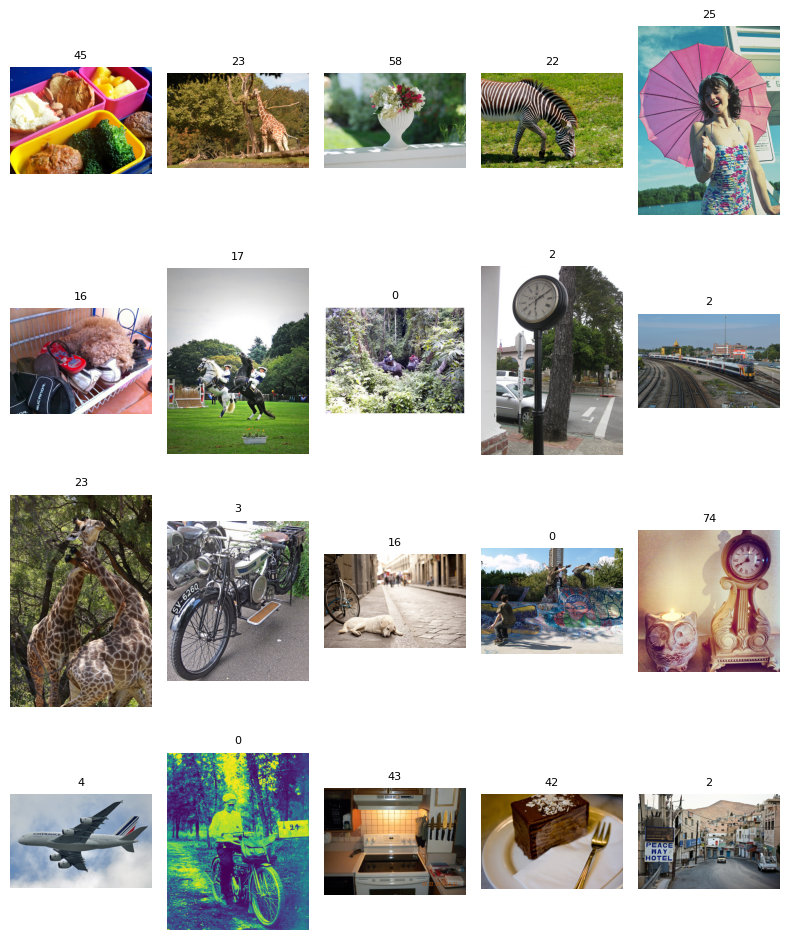

In [42]:
import os
from datasets import load_dataset
from matplotlib import pyplot as plt

# COCO 데이터셋 로드
dataset = load_dataset(
    path="detection-datasets/coco", name="default", split="train", streaming=True
)

# 이미지 저장 폴더와 이미지 개수 설정
IMAGE_FOLDER = "tmp"
N_IMAGES = 20

# 그래프 플로팅을 위한 설정
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows * 2, plot_cols * 2))
axes = axes.flatten()

# 이미지를 폴더에 저장하고 그래프에 표시
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
    # 데이터셋에서 이미지와 레이블 추출
    data = next(dataset_iter)
    image = data["image"]
    label = data["objects"]["category"][0]  # 첫 번째 객체의 카테고리를 레이블로 사용

    # 그래프에 이미지 표시 및 레이블 추가
    axes[i].imshow(image)
    axes[i].set_title(label, fontsize=8)
    axes[i].axis("off")

    # 이미지 파일로 저장
    image.save(f"{IMAGE_FOLDER}/{i}.jpg")

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

![](./images/chroma-01.png)

### Multimodal Embeddings

Multimodal Embeddings 을 활용하여 이미지, 텍스트에 대한 Embedding 을 생성합니다.

이번 튜토리얼에서는 OpenClipEmbeddingFunction 을 사용하여 이미지를 임베딩합니다.

- [OpenCLIP](https://github.com/mlfoundations/open_clip/tree/main)

### Model 벤치마크

| Model                              | Training data  | Resolution | # of samples seen | ImageNet zero-shot acc. |
|------------------------------------|----------------|------------|-------------------|-------------------------|
| ConvNext-Base                       | LAION-2B       | 256px      | 13B               | 71.5%                   |
| ConvNext-Large                      | LAION-2B       | 320px      | 29B               | 76.9%                   |
| ConvNext-XXLarge                    | LAION-2B       | 256px      | 34B               | 79.5%                   |
| ViT-B/32                            | DataComp-1B    | 256px      | 34B               | 72.8%                   |
| ViT-B/16                            | DataComp-1B    | 224px      | 13B               | 73.5%                   |
| ViT-L/14                            | LAION-2B       | 224px      | 32B               | 75.3%                   |
| ViT-H/14                            | LAION-2B       | 224px      | 32B               | 78.0%                   |
| ViT-L/14                            | DataComp-1B    | 224px      | 13B               | 79.2%                   |
| ViT-G/14                            | LAION-2B       | 224px      | 34B               | 80.1%                   |
| ViT-L/14 ([Original CLIP](https://openai.com/research/clip)) | WIT            | 224px      | 13B               | 75.5%                   |
| ViT-SO400M/14 ([SigLIP](https://github.com/mlfoundations/open_clip)) | WebLI | 224px | 45B | 82.0% |
| ViT-SO400M-14-SigLIP-384 ([SigLIP](https://github.com/mlfoundations/open_clip)) | WebLI | 384px | 45B | 83.1% |
| ViT-H/14-quickgelu ([DFN](https://www.deeplearning.ai/glossary/neural-networks/)) | DFN-5B | 224px | 39B | 83.4% |
| ViT-H-14-378-quickgelu ([DFN](https://www.deeplearning.ai/glossary/neural-networks/)) | DFN-5B | 378px | 44B | 84.4% |


아래의 예시에서 `model_name` 과 `checkpoint` 를 설정하여 사용합니다.

- `model_name`: OpenCLIP 모델명
- `checkpoint`: OpenCLIP 모델의 `Training data` 에 해당하는 이름

In [43]:
import open_clip
import pandas as pd

# 사용 가능한 모델/Checkpoint 를 출력
pd.DataFrame(open_clip.list_pretrained(), columns=["model_name", "checkpoint"]).head(10)

model_name     checkpoint
0       RN50         openai
1       RN50        yfcc15m
2       RN50          cc12m
3      RN101         openai
4      RN101        yfcc15m
5     RN50x4         openai
6    RN50x16         openai
7    RN50x64         openai
8   ViT-B-32         openai
9   ViT-B-32  laion400m_e31

In [44]:
# 이미지와 텍스트를 동일한 벡터 공간으로 임베딩하는 멀티모달 임베딩 함수
from langchain_experimental.open_clip import OpenCLIPEmbeddings

# OpenCLIP 임베딩 함수 객체 생성
image_embedding_function = OpenCLIPEmbeddings(
    model_name="ViT-H-14-378-quickgelu", checkpoint="dfn5b"
)

open_clip_pytorch_model.bin:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

이미지의 경로를 list 로 저장합니다.

In [45]:
# 이미지의 경로를 리스트로 저장
image_uris = sorted(
    [
        os.path.join("tmp", image_name)
        for image_name in os.listdir("tmp")
        if image_name.endswith(".jpg")
    ]
)

image_uris

['tmp/0.jpg',
 'tmp/1.jpg',
 'tmp/10.jpg',
 'tmp/11.jpg',
 'tmp/12.jpg',
 'tmp/13.jpg',
 'tmp/14.jpg',
 'tmp/15.jpg',
 'tmp/16.jpg',
 'tmp/17.jpg',
 'tmp/18.jpg',
 'tmp/19.jpg',
 'tmp/2.jpg',
 'tmp/3.jpg',
 'tmp/4.jpg',
 'tmp/5.jpg',
 'tmp/6.jpg',
 'tmp/7.jpg',
 'tmp/8.jpg',
 'tmp/9.jpg']

In [46]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
import base64
from io import BytesIO
from PIL import Image

# ChatOpenAI 모델 초기화 (vision 지원 모델)
llm = ChatOpenAI(model="gpt-4o-mini")

def describe_image(image_path: str) -> str:
    """이미지를 설명하는 함수"""
    # 이미지를 base64로 인코딩
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode('utf-8')
    
    # 메시지 구성
    message = HumanMessage(
        content=[
            {"type": "text", "text": "Describe this image in one sentence (less than 60 characters)."},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
        ]
    )
    
    # 응답 생성
    response = llm.invoke([message])
    return response.content

image 에 대한 description 을 생성합니다.

In [48]:
# 이미지 설명 생성
describe_image(image_uris[1])

'Two giraffes are eating leaves from a tree.'

![](./images/chroma-02.png)

In [51]:
# 이미지 설명
descriptions = dict()

print("이미지 설명을 생성하는 중...")
for i, image_uri in enumerate(image_uris):
    print(f"처리 중: {i+1}/{len(image_uris)} - {image_uri}")
    descriptions[image_uri] = describe_image(image_uri)

# 생성된 결과물 출력
print("\n✅ 이미지 설명 생성 완료!")
descriptions

이미지 설명을 생성하는 중...
처리 중: 1/20 - tmp/0.jpg
처리 중: 2/20 - tmp/1.jpg
처리 중: 2/20 - tmp/1.jpg
처리 중: 3/20 - tmp/10.jpg
처리 중: 3/20 - tmp/10.jpg
처리 중: 4/20 - tmp/11.jpg
처리 중: 4/20 - tmp/11.jpg
처리 중: 5/20 - tmp/12.jpg
처리 중: 5/20 - tmp/12.jpg
처리 중: 6/20 - tmp/13.jpg
처리 중: 6/20 - tmp/13.jpg
처리 중: 7/20 - tmp/14.jpg
처리 중: 7/20 - tmp/14.jpg
처리 중: 8/20 - tmp/15.jpg
처리 중: 8/20 - tmp/15.jpg
처리 중: 9/20 - tmp/16.jpg
처리 중: 9/20 - tmp/16.jpg
처리 중: 10/20 - tmp/17.jpg
처리 중: 10/20 - tmp/17.jpg
처리 중: 11/20 - tmp/18.jpg
처리 중: 11/20 - tmp/18.jpg
처리 중: 12/20 - tmp/19.jpg
처리 중: 12/20 - tmp/19.jpg
처리 중: 13/20 - tmp/2.jpg
처리 중: 13/20 - tmp/2.jpg
처리 중: 14/20 - tmp/3.jpg
처리 중: 14/20 - tmp/3.jpg
처리 중: 15/20 - tmp/4.jpg
처리 중: 15/20 - tmp/4.jpg
처리 중: 16/20 - tmp/5.jpg
처리 중: 16/20 - tmp/5.jpg
처리 중: 17/20 - tmp/6.jpg
처리 중: 17/20 - tmp/6.jpg
처리 중: 18/20 - tmp/7.jpg
처리 중: 18/20 - tmp/7.jpg
처리 중: 19/20 - tmp/8.jpg
처리 중: 19/20 - tmp/8.jpg
처리 중: 20/20 - tmp/9.jpg
처리 중: 20/20 - tmp/9.jpg

✅ 이미지 설명 생성 완료!

✅ 이미지 설명 생성 완료!


{'tmp/0.jpg': 'Colorful lunchbox with various healthy snacks and meals.',
 'tmp/1.jpg': 'Two giraffes are feeding on leaves from a tree.',
 'tmp/10.jpg': 'Two giraffes playfully interact among the trees.',
 'tmp/11.jpg': 'An antique motorcycle with a vintage design and features.',
 'tmp/12.jpg': 'A sleepy dog rests on a cobbled street near a bicycle.',
 'tmp/13.jpg': 'A skater performs tricks at a colorful skatepark.',
 'tmp/14.jpg': 'A decorative owl candle holder and vintage clock on display.',
 'tmp/15.jpg': 'An Air France airplane flies through a cloudy sky.',
 'tmp/16.jpg': 'A man on an early motorcycle stops near a mailbox.',
 'tmp/17.jpg': 'A clean kitchen with a stove and hanging knives.',
 'tmp/18.jpg': 'A chocolate layered cake on a white plate with a fork.',
 'tmp/19.jpg': 'Quiet street with shops and a hotel sign.',
 'tmp/2.jpg': 'A white vase holds a vibrant floral arrangement outdoors.',
 'tmp/3.jpg': 'A zebra grazes on green grass under sunny conditions.',
 'tmp/4.jpg': 

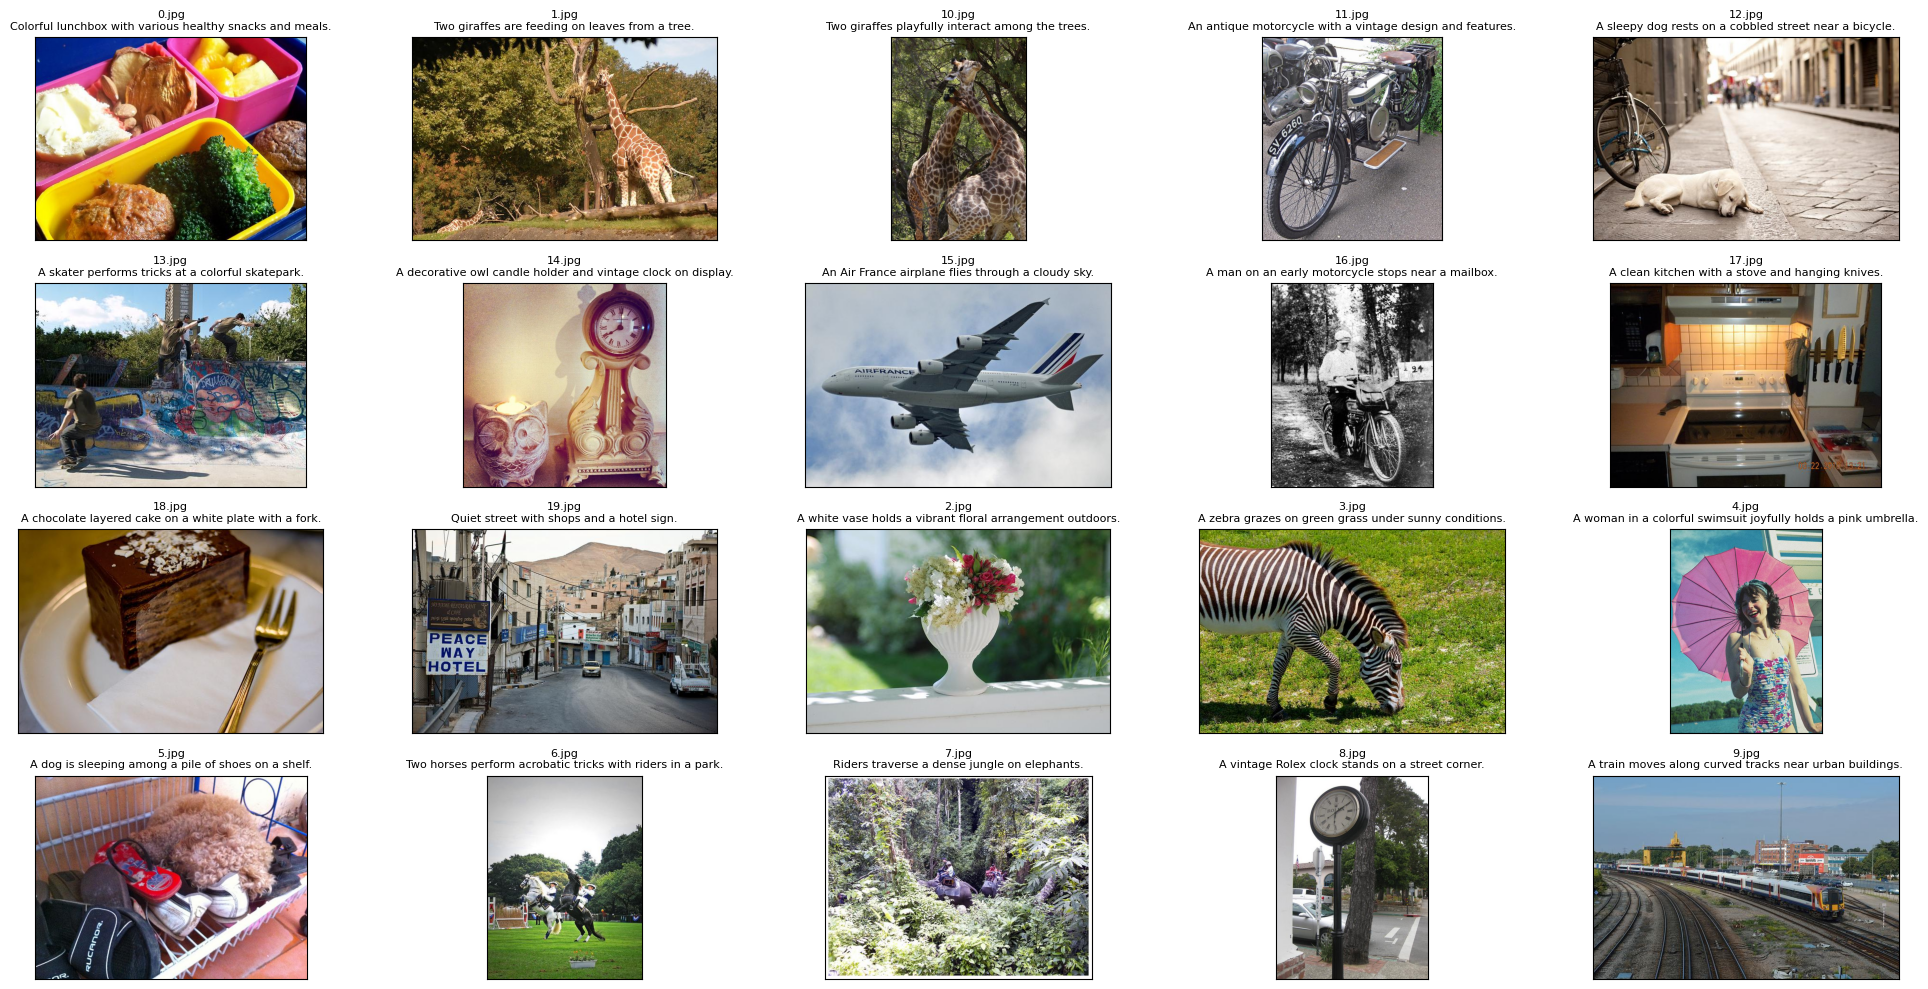

In [52]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 원본 이미지, 처리된 이미지, 텍스트 설명을 저장할 리스트 초기화
original_images = []
images = []
texts = []

# 그래프 크기 설정 (20x10 인치)
plt.figure(figsize=(20, 10))

# 'tmp' 디렉토리에 저장된 이미지 파일들을 처리
for i, image_uri in enumerate(image_uris):
    # 이미지 파일 열기 및 RGB 모드로 변환
    image = Image.open(image_uri).convert("RGB")

    # 4x5 그리드의 서브플롯 생성
    plt.subplot(4, 5, i + 1)

    # 이미지 표시
    plt.imshow(image)

    # 이미지 파일명과 설명을 제목으로 설정
    plt.title(f"{os.path.basename(image_uri)}\n{descriptions[image_uri]}", fontsize=8)

    # x축과 y축의 눈금 제거
    plt.xticks([])
    plt.yticks([])

    # 원본 이미지, 처리된 이미지, 텍스트 설명을 각 리스트에 추가
    original_images.append(image)
    images.append(image)
    texts.append(descriptions[image_uri])

# 서브플롯 간 간격 조정
plt.tight_layout()

![](./images/chroma-03.png)

아래는 생성한 이미지 description 과 텍스트 간의 유사도를 계산합니다.

In [53]:
import numpy as np

# 이미지와 텍스트 임베딩
# 이미지 URI를 사용하여 이미지 특징 추출
img_features = image_embedding_function.embed_image(image_uris)
# 텍스트 설명에 "This is" 접두사를 추가하고 텍스트 특징 추출
text_features = image_embedding_function.embed_documents(
    ["This is " + desc for desc in texts]
)

# 행렬 연산을 위해 리스트를 numpy 배열로 변환
img_features_np = np.array(img_features)
text_features_np = np.array(text_features)

# 유사도 계산
# 텍스트와 이미지 특징 간의 코사인 유사도를 계산
similarity = np.matmul(text_features_np, img_features_np.T)

텍스트 대 이미지 description 간 유사도를 구하고 시각화합니다.

Text(0.5, 1.0, 'Cosine Similarity')

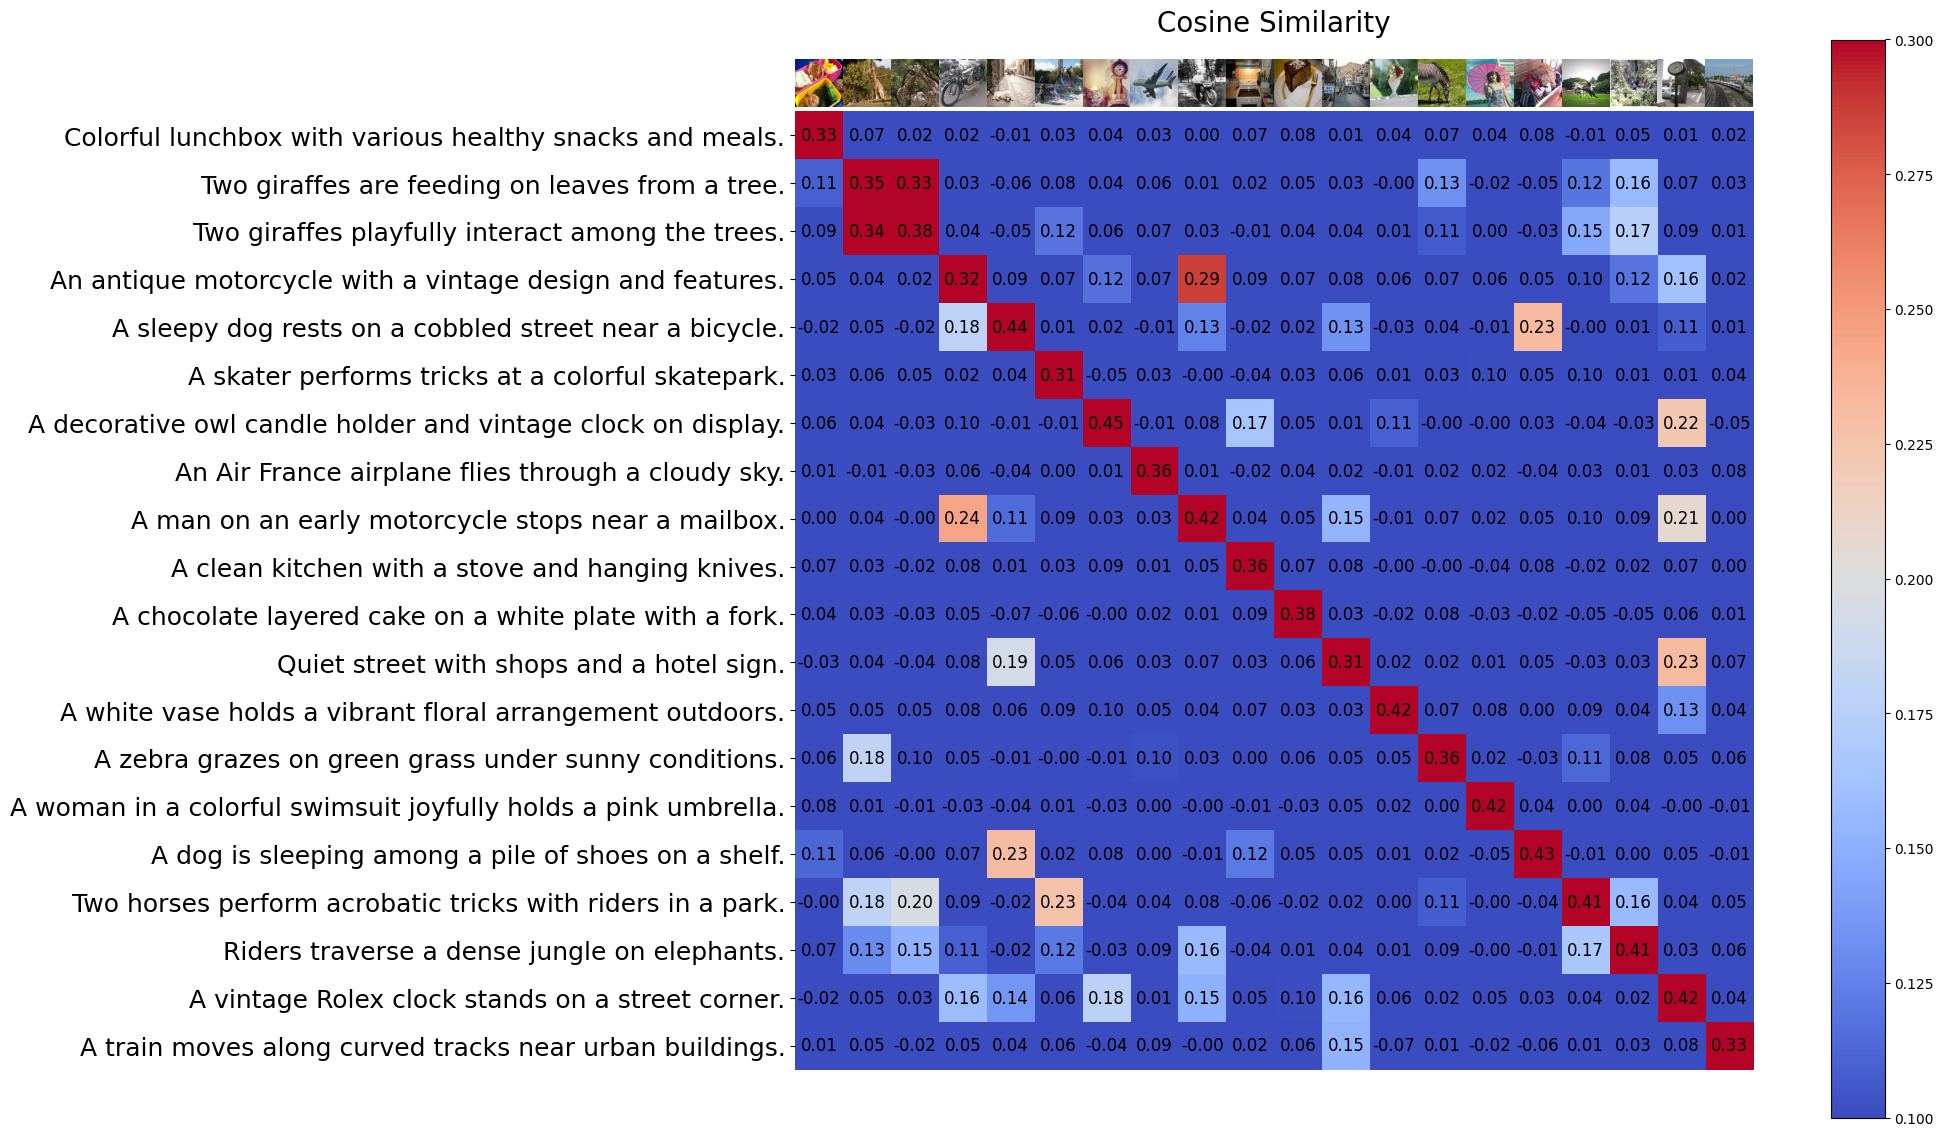

In [54]:
# 유사도 행렬을 시각화하기 위한 플롯 생성
count = len(descriptions)
plt.figure(figsize=(20, 14))

# 유사도 행렬을 히트맵으로 표시
plt.imshow(similarity, vmin=0.1, vmax=0.3, cmap="coolwarm")
plt.colorbar()  # 컬러바 추가

# y축에 텍스트 설명 표시
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])  # x축 눈금 제거

# 원본 이미지를 x축 아래에 표시
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

# 유사도 값을 히트맵 위에 텍스트로 표시
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

# 플롯 테두리 제거
for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

# 플롯 범위 설정
plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

# 제목 추가
plt.title("Cosine Similarity", size=20)

![](./images/chroma-04.png)

### Vectorstore 생성 및 이미지 추가

Vectorstore 를 생성하고 이미지를 추가합니다.

In [55]:
# DB 생성
image_db = Chroma(
    collection_name="multimodal",
    embedding_function=image_embedding_function,
)

# 이미지 추가
image_db.add_images(uris=image_uris)

['74724ffa-7aad-4996-9661-dc16e52c7a81',
 '8ed9771b-b021-4dd7-bffd-e5d590c433d4',
 'c4aaffb6-d1f0-460e-bebd-1332c4116994',
 'be034ae9-7d4d-4481-9210-16e1b1051548',
 'd897f1bd-2943-4f1a-b4f8-9f8cbbb35353',
 '72312fe1-a3bc-440e-bf98-ea4ec278f1d4',
 '6d3111ed-b323-47a0-b1a2-2a0c1353eb76',
 'c9bd9288-24a0-44a8-9a97-7b63d1b927f8',
 '6470339b-32e8-4976-aa1f-c6bd475d189b',
 '885a28c5-47b0-43cb-a7e9-d91d6eb7e0f4',
 '2b18d03c-26e8-40ed-96ed-83c2e2f354c4',
 '280568cf-1980-45e4-a899-260445a21435',
 'e8d29738-4e52-4bad-a180-26fd40a25338',
 'a6dbeb4a-a43d-485c-aa69-be69550f4b70',
 '04a7bc1f-a42d-460e-9c14-355012b4c2d3',
 '23611799-dffd-4a5e-9984-690965ec50c3',
 '99f5d5bf-ad0f-4747-8334-5ad60ee0ccff',
 '6bafea87-aff4-4b7d-bc75-17403bcad90d',
 '93c89ad1-f48d-46a2-9f2d-2753d397e8a9',
 '1beb46dc-9dbc-4008-bfd5-68822c5d2d90']

아래는 이미지 검색된 결과를 이미지로 출력하기 위한 helper class 입니다.

In [56]:
import base64
import io
from PIL import Image
from IPython.display import HTML, display
from langchain.schema import Document


class ImageRetriever:
    def __init__(self, retriever):
        """
        이미지 검색기를 초기화합니다.

        인자:
        retriever: LangChain의 retriever 객체
        """
        self.retriever = retriever

    def invoke(self, query):
        """
        쿼리를 사용하여 이미지를 검색하고 표시합니다.

        인자:
        query (str): 검색 쿼리
        """
        docs = self.retriever.invoke(query)
        if docs and isinstance(docs[0], Document):
            self.plt_img_base64(docs[0].page_content)
        else:
            print("검색된 이미지가 없습니다.")
        return docs

    @staticmethod
    def resize_base64_image(base64_string, size=(224, 224)):
        """
        Base64 문자열로 인코딩된 이미지의 크기를 조정합니다.

        인자:
        base64_string (str): 원본 이미지의 Base64 문자열.
        size (tuple): (너비, 높이)로 표현된 원하는 이미지 크기.

        반환:
        str: 크기가 조정된 이미지의 Base64 문자열.
        """
        img_data = base64.b64decode(base64_string)
        img = Image.open(io.BytesIO(img_data))
        resized_img = img.resize(size, Image.LANCZOS)
        buffered = io.BytesIO()
        resized_img.save(buffered, format=img.format)
        return base64.b64encode(buffered.getvalue()).decode("utf-8")

    @staticmethod
    def plt_img_base64(img_base64):
        """
        Base64로 인코딩된 이미지를 표시합니다.

        인자:
        img_base64 (str): Base64로 인코딩된 이미지 문자열
        """
        image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
        display(HTML(image_html))

In [57]:
# Image Retriever 생성
retriever = image_db.as_retriever(search_kwargs={"k": 3})
image_retriever = ImageRetriever(retriever)


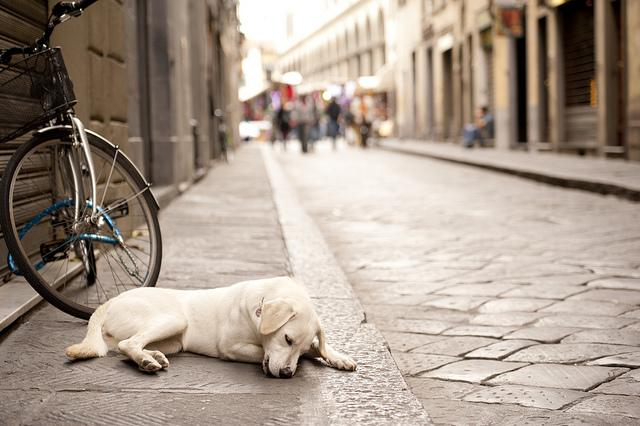

In [58]:
# 이미지 조회
result = image_retriever.invoke("A Dog on the street")

![](./images/chroma-05.png)


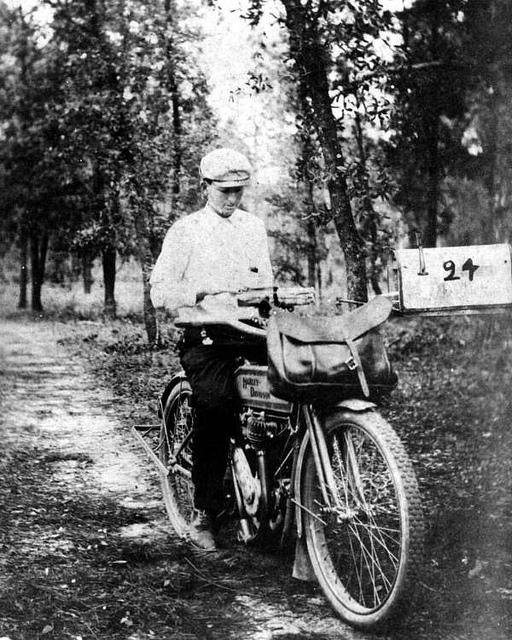

In [59]:
# 이미지 조회
result = image_retriever.invoke("Motorcycle with a man")

![](./images/chroma-06.png)